# Exploratory Data Analyisis of Wallmart Data Set

Data Source : Kaggle  

The data has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemployment.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"D:\Backup Folder\eda practice\Wallmart Sales Data\archive\walmart-sales-dataset-of-45stores.csv")

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [15]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Basic Information and Formatting

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [17]:
data["Day"] = data["Date"].str.split("-").str[0]
data["Month"] = data["Date"].str.split("-").str[1]
data["Year"] = data["Date"].str.split("-").str[2]
data["Day"] = data["Day"].astype("int")
data["Month"] = data["Month"].astype("int")
data["Year"] = data["Year"].astype("int")

In [18]:
data["MMYYYY"] = data["Month"].astype("str") +"-" + data["Year"].astype("str")

In [19]:
data["MMYYYY"] = pd.to_datetime(data["MMYYYY"], format="%m-%Y")

In [20]:
data.drop("Date", axis = 1, inplace = True)

In [1]:
colors = [
    "#1f77b4",  # Steel Blue
    "#ff7f0e",  # Dark Orange
    "#2ca02c",  # Forest Green
    "#d62728",  # Firebrick
    "#9467bd",  # Purple
    "#8c564b",  # Sienna
    "#e377c2",  # Orchid
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf"   # Turquoise
]


In [28]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
MMYYYY          0
dtype: int64

## &#128373;&#8205;&#9792; The dataset does not contain any null values.

In [29]:
data.duplicated().sum() 

0

## &#128373;&#8205;&#9792; There are no duplicates entries in the data set

In [30]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


# Correlation 

<AxesSubplot:>

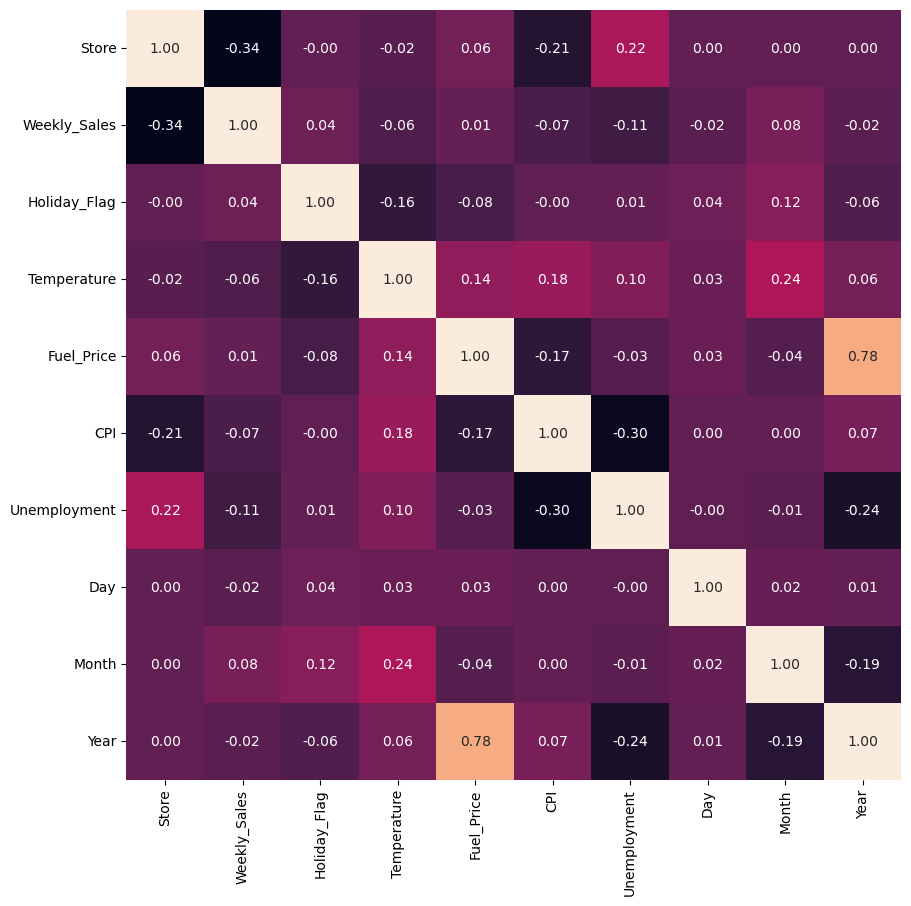

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True, cbar = False, fmt = ".2f")

## &#128373;&#8205;&#9792; Based solely on correlation, we can only infer that there is a positive relationship between the year and fuel prices, meaning that as the year increases, so do the fuel prices.

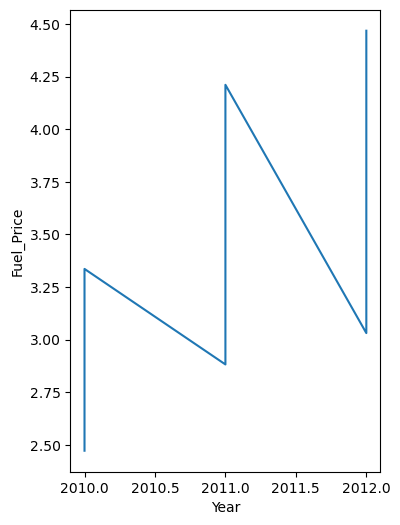

In [26]:
plt.figure(figsize=(4, 6))
sns.lineplot(x = data['Year'], y = data["Fuel_Price"], estimator = None )
plt.show()

# Weekly_Sales

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


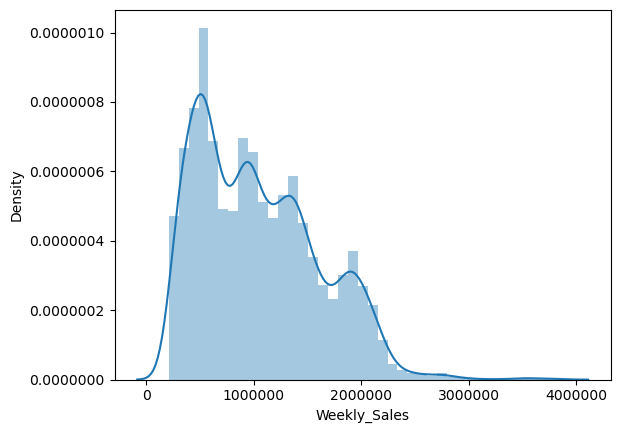

In [27]:
sns.distplot(data['Weekly_Sales'])
plt.ticklabel_format(style = "plain")

# Stores and Weekly_Sales

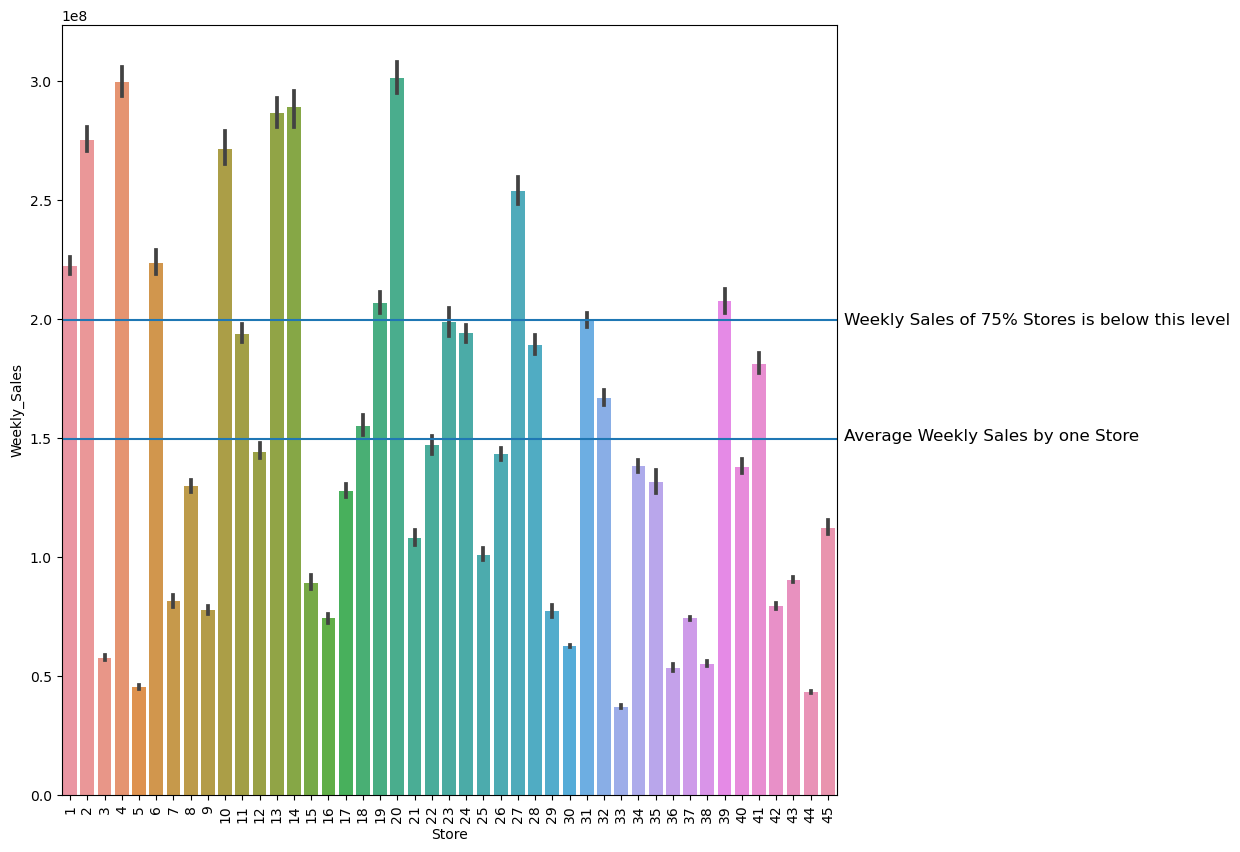

In [49]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = "Store", y = "Weekly_Sales", estimator = sum, )
plt.axhline(y = np.mean(data.groupby("Store").sum()["Weekly_Sales"]) )
plt.text(1.01, 0.46, 'Average Weekly Sales by one Store', transform=plt.gca().transAxes,  fontsize=12)
plt.axhline(y = np.percentile(data.groupby("Store").sum()["Weekly_Sales"], q = 75))
plt.text(1.01, 0.61, "Weekly Sales of 75% Stores is below this level", transform=plt.gca().transAxes,  fontsize=12)
plt.xticks(rotation = 90)
plt.ticklabel_format(scilimits=(0, 0), axis = "y")

## &#128373;&#8205;&#9792;
### 1. The total number of stores is 45.
### 2. Stores 2, 4, 10, 13, 14, and 20 are in the top 25% based on the specified criteria.
### 3. Stores 11, 17, 23, 24, 28, 31, 32, and 41 are performing above average.

# Top 20 Stores by Weekly Sales

In [35]:
avg_sales_per_store = dict(data.groupby("Store").sum()["Weekly_Sales"].sort_values(ascending=False))

In [36]:
top_stores = []
top_stores_avg_sales = []
i = 1
other_sales = 0
for store, avg_sale in avg_sales_per_store.items():
    if i<=20:
        top_stores.append(store)
        top_stores_avg_sales.append(avg_sale)
        i+=1
    
    else:
        other_sales += avg_sale

top_stores.append("Others")
top_stores_avg_sales.append(other_sales)

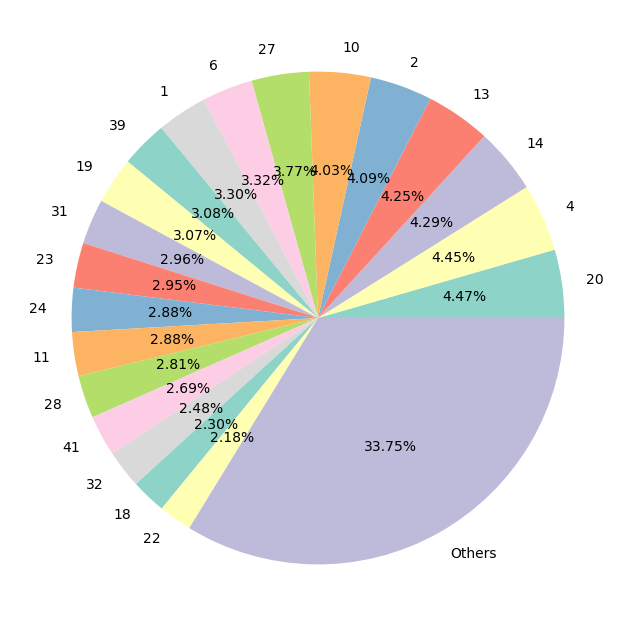

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(x = top_stores_avg_sales, labels = top_stores, autopct="%1.2f%%", colors=colors)
plt.show()

# Temperature and Weekly Sales

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

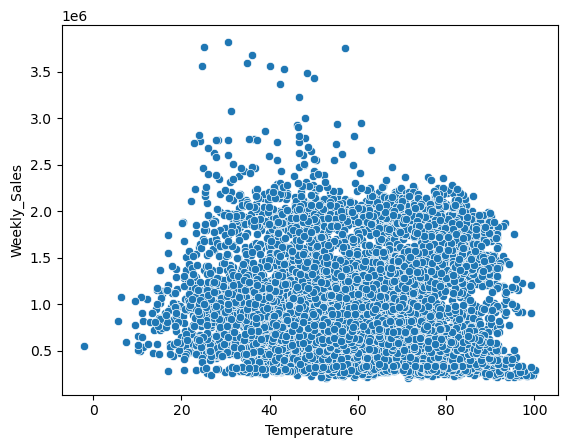

In [47]:
sns.scatterplot(data = data, x = "Temperature", y = 'Weekly_Sales')

## &#128373;&#8205;&#9792;
## 1. Sales begin to increase when the temperature rises above 10 degrees.
## 2. The majority of sales occur when the temperature is between 10 and 62 degrees.

# Holiday and Weekly Sales

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

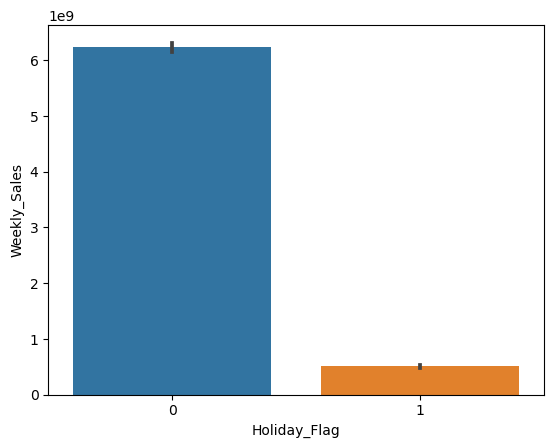

In [50]:
sns.barplot(x = data["Holiday_Flag"], y = data['Weekly_Sales'], estimator = sum)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 450, '450')

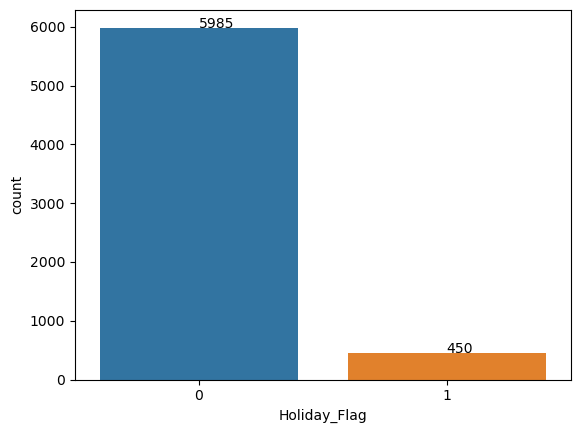

In [52]:
sns.countplot(data["Holiday_Flag"])
plt.text(y = data[data["Holiday_Flag"] == 0].count()[0], x = 0, s =  data[data["Holiday_Flag"] == 0].count()[0])
plt.text(y = data[data["Holiday_Flag"] == 1].count()[0], x = 1, s =  data[data["Holiday_Flag"] == 1].count()[0])

Text(1, 1122888.8923555554, '1122887')

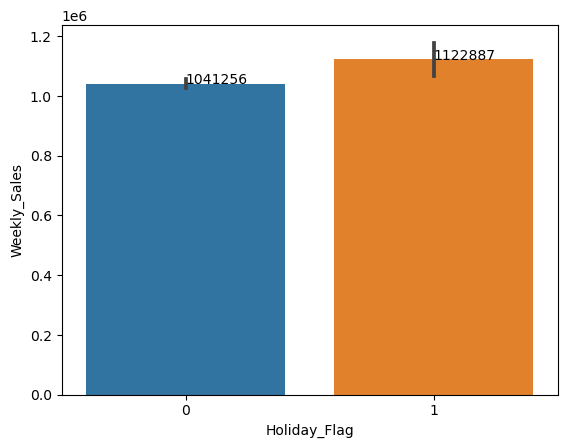

In [53]:
sns.barplot(x = data["Holiday_Flag"], y = data['Weekly_Sales'], estimator = np.mean)
plt.text(x = 0, y = np.mean(data[data["Holiday_Flag"] == 0]["Weekly_Sales"]) + 1, s = int(np.mean(data[data["Holiday_Flag"] == 0]["Weekly_Sales"])))
plt.text(x = 1, y = np.mean(data[data["Holiday_Flag"] == 1]["Weekly_Sales"]) + 1, s = int(np.mean(data[data["Holiday_Flag"] == 1]["Weekly_Sales"])))

## &#128373;&#8205;&#9792;
## 1. It is apparent that the number of holidays is significantly less than the number of weekly working days, resulting in higher aggregate sales from working weeks.
## 2. However, we observe that the average weekly sales during a holiday week are greater than those during a working week. This indicates that sales tend to be higher during festivals and other holidays.

# CPI and Weekly_Sales

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

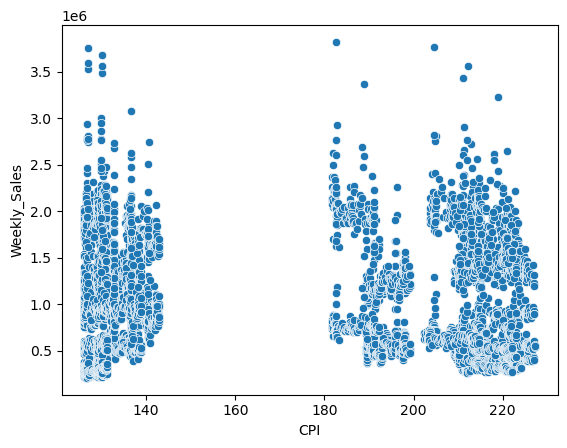

In [54]:
sns.scatterplot(data= data, x = "CPI", y = "Weekly_Sales")

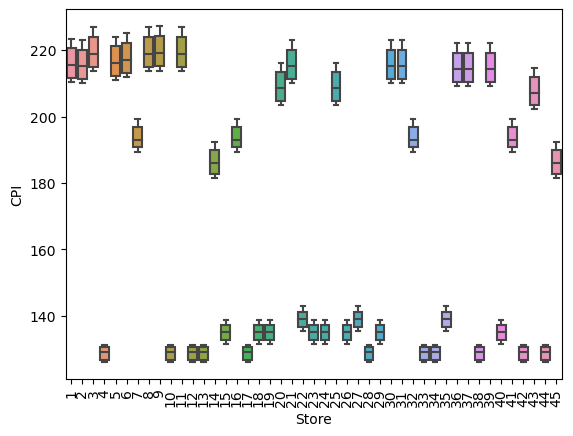

In [55]:
sns.boxplot(data= data, x = "Store", y = 'CPI')
plt.xticks(rotation = "90")
plt.show()

## &#128373;&#8205;&#9792;
### It indicates that there are three categories of CPI:

### * Low - Approximately 140 and below
### * Moderate - Between 180 and 200
### * High - Above 200

### These categories are likely due to certain stores, which may be a result of the products sold or the general nature of the store.

In [62]:
data["CPI Range"] = np.where(data["CPI"] < 160 , "Low", (np.where(data["CPI"] <= 200, "Moderate", "High")))

In [64]:
for flag in ["Low", "Moderate", "High"]:
    print(f"Stores with {flag} CPI")
    print(data[data["CPI Range"] == flag]["Store"].unique())
    print("#########################")

Stores with Low CPI
[ 4 10 12 13 15 17 18 19 22 23 24 26 27 28 29 33 34 35 38 40 42 44]
#########################
Stores with Moderate CPI
[ 7 14 16 32 41 45]
#########################
Stores with High CPI
[ 1  2  3  5  6  8  9 11 20 21 25 30 31 36 37 39 43]
#########################


# Time Series Analysis of Weekly Sales 

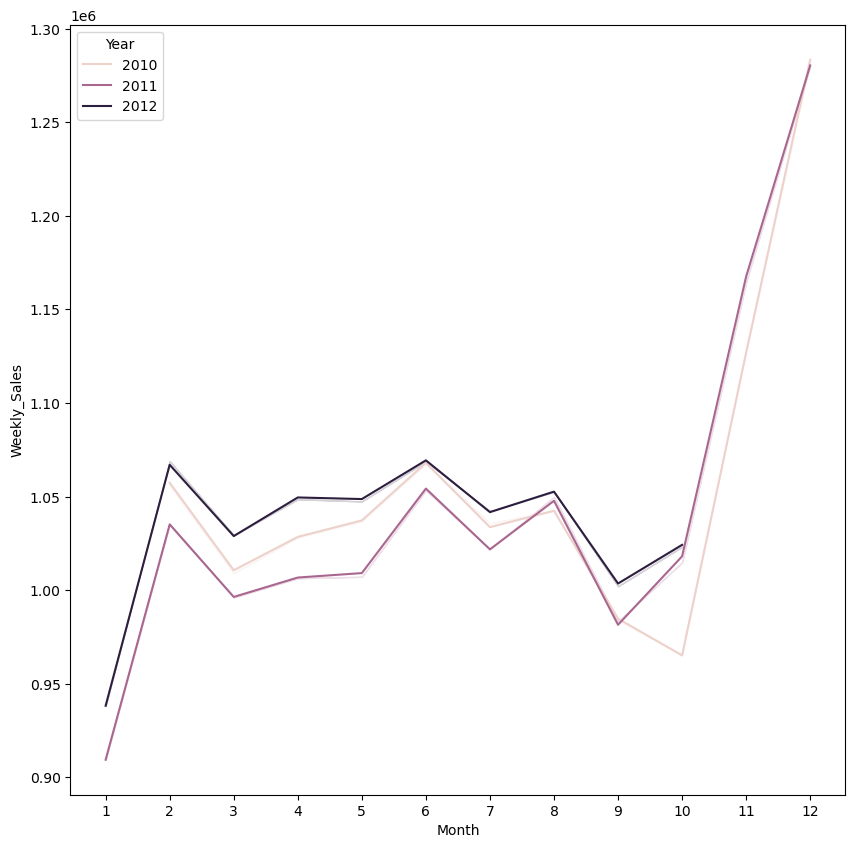

In [65]:
plt.figure(figsize=(10, 10))
sns.lineplot(data = data, x = "Month", y = "Weekly_Sales", hue = "Year", ci = 0, estimator=np.mean)
plt.xticks(data["Month"].unique()) # To display all values of x axis (Months)
plt.show()

## &#128373;&#8205;&#9792;
## * December has the highest sales and is the best month for sales.
## * Sales decline from June to November.
## * January has the lowest sales.

## * The year 2011 had reduced sales, but the company has attempted to improve the situation in 2012.
## * Since there are no sales data for December 2012, it can be inferred that the available data only goes up to November 2012.

In [67]:
data[(data["Month"] == "12") & (data["Year"] == "2012")]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,MMYYYY,CPI Range


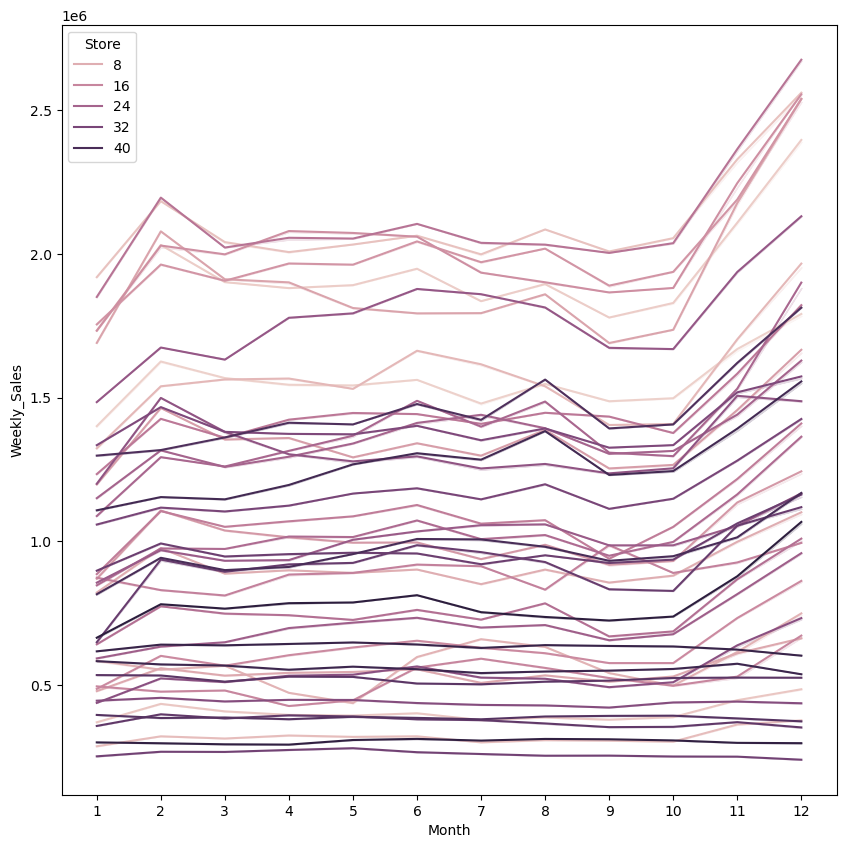

In [68]:
plt.figure(figsize=(10, 10))
sns.lineplot(data = data, x = "Month", y = "Weekly_Sales", hue = "Store", ci = 0, estimator=np.mean)
plt.xticks(data["Month"].unique()) # To display all values of x axis (Monhts)
plt.show()

## &#128373;&#8205;&#9792;
## The analysis indicates that the majority of stores exhibit a similar pattern in their monthly sales.

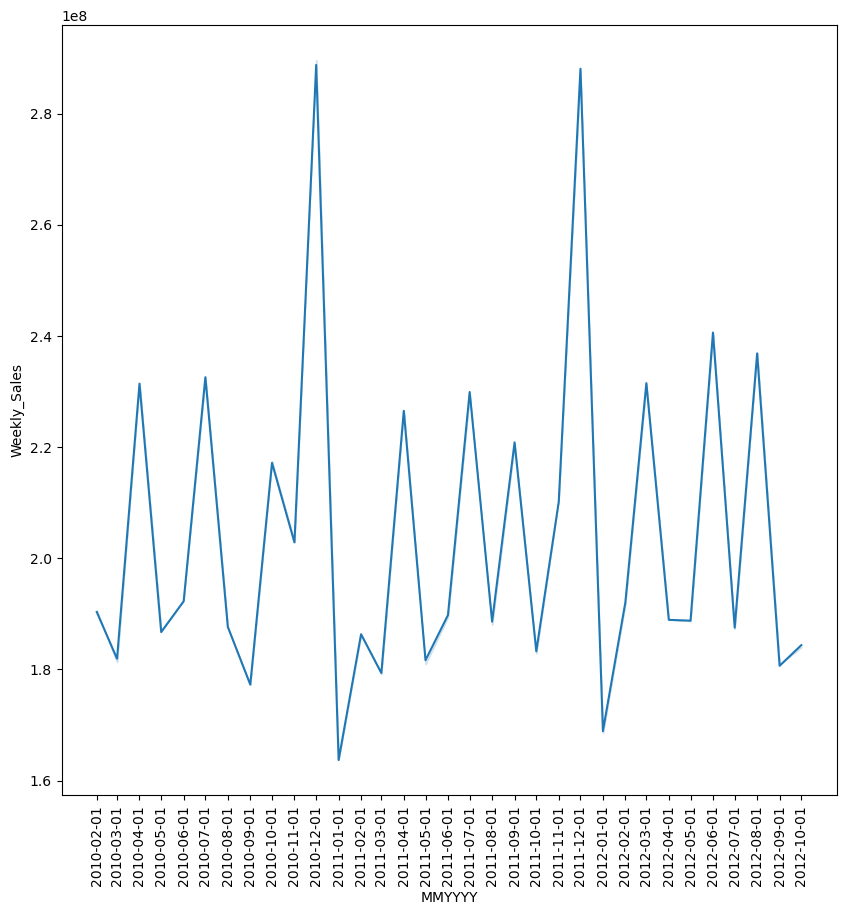

In [69]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=  data, x = "MMYYYY", y = "Weekly_Sales", ci = 0, estimator=sum)
plt.xticks(data["MMYYYY"].unique(), rotation = 90)
plt.show()

# Unemployment and Fuel Price

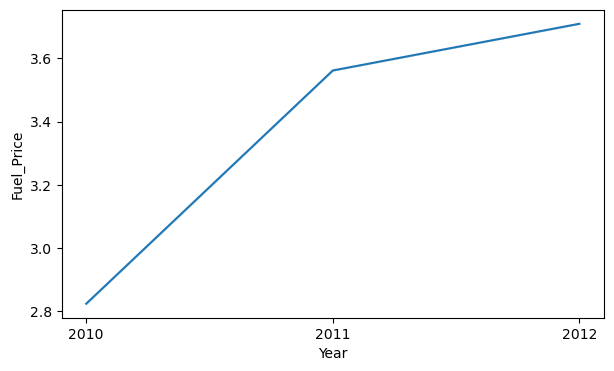

In [71]:
plt.figure(figsize=(7, 4))
sns.lineplot(data = data, x = "Year", y = "Fuel_Price", ci = 0, estimator=np.mean)
plt.xticks(data["Year"].unique()) 
plt.show()

## &#128373;&#8205;&#9792;
## It shows that there has been increase in fuel_price year on year, which is also indicated by the strong positive correlation between year and fuel_price

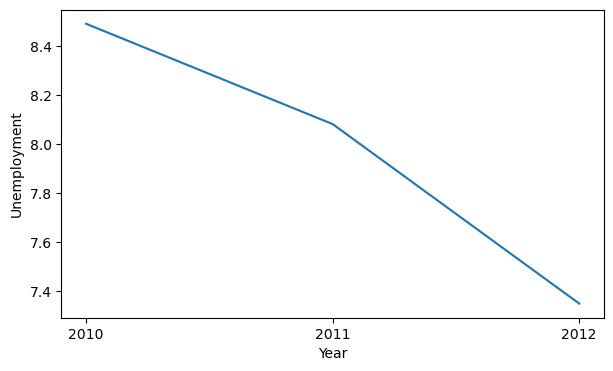

In [72]:
plt.figure(figsize=(7, 4))
sns.lineplot(data = data, x = "Year", y = "Unemployment", ci = 0, estimator=np.mean)
plt.xticks(data["Year"].unique())
plt.show()

## &#128373;&#8205;&#9792;
## It is apparent that the average unemployment has decreased over the years.

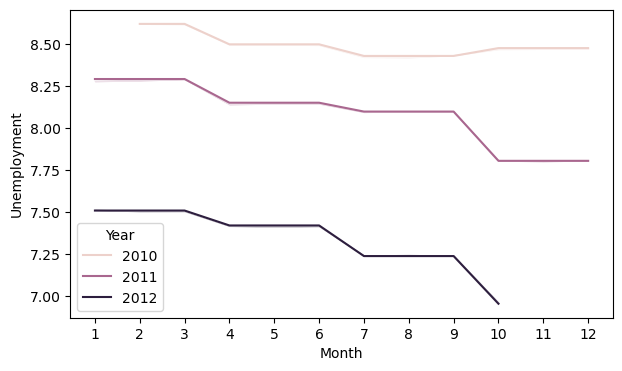

In [73]:
plt.figure(figsize=(7, 4))
sns.lineplot(data = data, x = "Month", y = "Unemployment", hue = "Year" ,ci = 0, estimator=np.mean)
plt.xticks(data["Month"].unique()) # To display all values of x axis (Months)
plt.show()

## &#128373;&#8205;&#9792;
## The unemployment rate typically starts off high at the beginning of the year and decreases towards the end of the year.

## This indicates a boom period towards the end of the year where unemployment decreases and sales increase. Conversely, the situation is opposite at the start of the year.